For comparing the data taken in summer 2019 to the mapping data from fall 2022

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as up
from stl import mesh
from mpl_toolkits import mplot3d
import pandas as pd
import sys, os
from matplotlib import cm

In [4]:
colNames = ['x', 'y', 'z','B_x', 'B_y', 'B_z']
file_22 = "data_export/map_referencedMSR_fall2022_together_interp50.txt"

data_22 = pd.read_csv(file_22, comment='#', sep='\t', names=colNames)

file_19 = "../MagMapping-export_TH_2019/data_export/map_referencedMSR_interp50.txt"

data_19 = pd.read_csv(file_19, comment='#', sep='\t', names=colNames)

# data_19

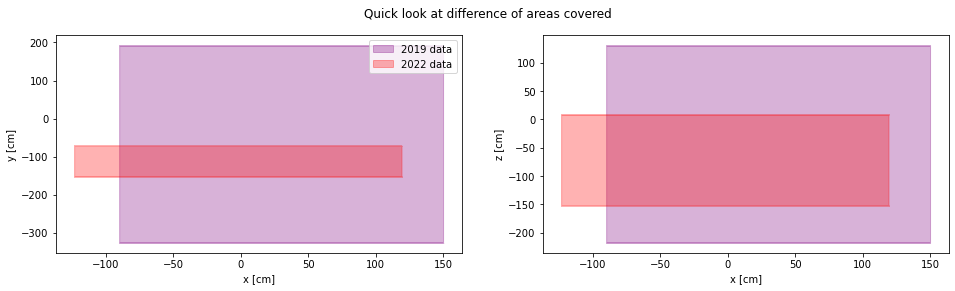

In [5]:
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(16,4))
plt.suptitle("Quick look at difference of areas covered")

minY_19 = np.min(data_19['y'])
maxY_19 = np.max(data_19['y'])
minY_22 = np.min(data_22['y'])
maxY_22 = np.max(data_22['y'])

axs[0].fill_between(data_19['x'], minY_19, maxY_19, color='purple',alpha=.3, label='2019 data')
axs[0].fill_between(data_22['x'], minY_22, maxY_22, color='r',alpha=.3, label='2022 data')

axs[0].set_xlabel('x [cm]')
axs[0].set_ylabel('y [cm]')
axs[0].legend()

minZ_19 = np.min(data_19['z'])
maxZ_19 = np.max(data_19['z'])
minZ_22 = np.min(data_22['z'])
maxZ_22 = np.max(data_22['z'])

axs[1].fill_between(data_19['x'], minZ_19, maxZ_19, color='purple',alpha=.3)
axs[1].fill_between(data_22['x'], minZ_22, maxZ_22, color='r',alpha=.3)

axs[1].set_xlabel('x [cm]')
axs[1].set_ylabel('z [cm]')

plt.show()

In [6]:
# print("2019 limits:")
mins_19 = np.min(data_19)
max_19 = np.max(data_19)

# print("2022 limits:")
mins_22 = np.min(data_22)
max_22 = np.max(data_22)

whichMin = mins_19 > mins_22

whichMax = max_19 < max_22

print("mins:", mins_19[whichMin].append(mins_22[~whichMin]))

print("max:", max_19[whichMax].append(max_22[~whichMax]))

mins: x      -90.100000
B_x     -2.439983
B_y     -1.496243
B_z     -3.812240
y     -152.302330
z     -151.385650
dtype: float64
max: B_x      1.602965
x      119.109390
y      -72.203790
z        8.623800
B_y    -28.780158
B_z   -161.401606
dtype: float64


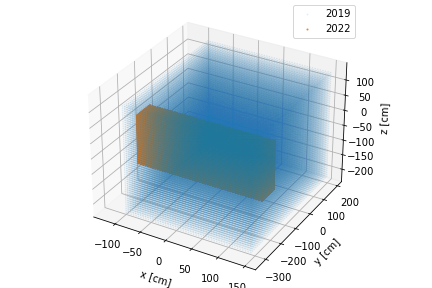

In [7]:
%matplotlib widget
fig = plt.figure() #figsize=(11, 5)
axes = mplot3d.Axes3D(fig)

Q_19 = axes.scatter(data_19['x'], data_19['y'], data_19['z'], s=.5, alpha=.1, label="2019")
Q_22 = axes.scatter(data_22['x'], data_22['y'], data_22['z'], s=1, alpha=1, label="2022" )
axes.set_xlabel('x [cm]')
axes.set_ylabel('y [cm]')
axes.set_zlabel('z [cm]')
axes.legend()
plt.show()

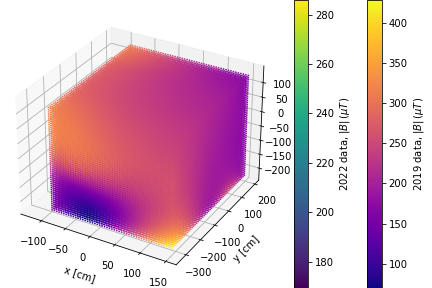

In [8]:
fig = plt.figure() #figsize=(11, 5)
axes = mplot3d.Axes3D(fig)

B1_19 = np.sqrt(data_19['B_x']**2 + data_19['B_y']**2 + data_19['B_z']**2 )*100 #muT
Q_19 = axes.scatter(data_19['x'], data_19['y'], data_19['z'],c=B1_19, s=.5, alpha=1, cmap=cm.plasma)

cbar_19 = fig.colorbar(Q_19, label='2019 data, $|B|\,(\mu T)$')

B1_22 = np.sqrt(data_22['B_x']**2 + data_22['B_y']**2 + data_22['B_z']**2 ) #muT
Q_22 = axes.scatter(data_22['x'], data_22['y'], data_22['z'],c=B1_22, s=1, alpha=1, cmap=cm.viridis)

cbar_22 = fig.colorbar(Q_22, label='2022 data, $|B|\,(\mu T)$')

plt.subplots_adjust(wspace=0.0)
axes.set_xlabel('x [cm]')
axes.set_ylabel('y [cm]')
axes.set_zlabel('z [cm]')
plt.show()